#Scaling Your Data: Normalization with Min-Max Scaler

##Part 1: Understanding Normalization and Environment Setup


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set up display options for better readability
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)

##Part 2: Loading and Exploring the Dataset


In [ ]:
# Load the Kaggle Loan Approval Prediction Dataset
!curl -L -o ./loan-approval-prediction-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/architsharma01/loan-approval-prediction-dataset
!unzip -o loan-approval-prediction-dataset.zip
df = pd.read_csv('loan_approval_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
df.columns = df.columns.str.strip() # Remove leading/trailing spaces


# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get statistical summary of numerical features
print("\nStatistical summary of numerical features:")
print(df.describe())


# Analyze the target variable distribution
print("\nTarget variable distribution:")
print(df['loan_status'].value_counts())
print(df['loan_status'].value_counts(normalize=True).round(2))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 82535  100 82535    0     0   222k      0 --:--:-- --:--:-- --:--:--  222k
Archive:  loan-approval-prediction-dataset.zip
  inflating: loan_approval_dataset.csv  
Dataset Shape: (4269, 13)

First 5 rows of the dataset:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \

##Part 3: Data Preparation


In [ ]:
# Drop any irrelevant columns
df = df.drop(['loan_id'], axis=1, errors='ignore')

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded)

# Separate features and target variable
X = df_encoded.drop('loan_status_ Rejected', axis=1)
y = df_encoded['loan_status_ Rejected']

# Print the feature names and their ranges to highlight scale differences
print("\nFeature ranges before normalization:")
for column in X.columns:
    print(f"{column}: [{X[column].min()}, {X[column].max()}]")

      no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                    2       9600000     29900000         12          778   
1                    0       4100000     12200000          8          417   
2                    3       9100000     29700000         20          506   
3                    3       8200000     30700000          8          467   
4                    5       9800000     24200000         20          382   
...                ...           ...          ...        ...          ...   
4264                 5       1000000      2300000         12          317   
4265                 0       3300000     11300000         20          559   
4266                 2       6500000     23900000         18          457   
4267                 1       4100000     12800000          8          780   
4268                 1       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_valu

##Part 4: Applying Min-Max Normalization


In [ ]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply normalization to the features
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display the normalized data
print("\nNormalized data (first 5 rows):")
print(X_normalized_df.head())

# Print the feature ranges after normalization
print("\nFeature ranges after normalization:")
for column in X_normalized_df.columns:
    print(f"{column}: [{X_normalized_df[column].min()}, {X_normalized_df[column].max()}]")


Normalized data (first 5 rows):
   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0               0.4      0.969072     0.755102   0.555556     0.796667   
1               0.0      0.402062     0.303571   0.333333     0.195000   
2               0.6      0.917526     0.750000   1.000000     0.343333   
3               0.6      0.824742     0.775510   0.333333     0.278333   
4               1.0      0.989691     0.609694   1.000000     0.136667   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                  0.085616                 0.907216             0.575835   
1                  0.095890                 0.113402             0.218509   
2                  0.246575                 0.231959             0.848329   
3                  0.626712                 0.170103             0.591260   
4                  0.428082                 0.422680             0.748072   

   bank_asset_value  education_ Not Graduate  self_employed

##Part 5: Visualizing the Transformation


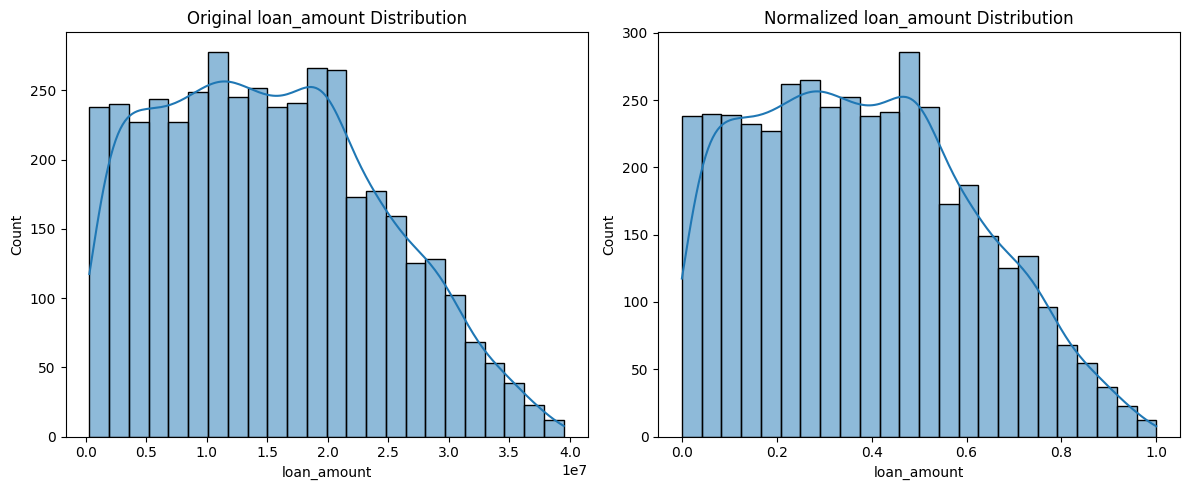

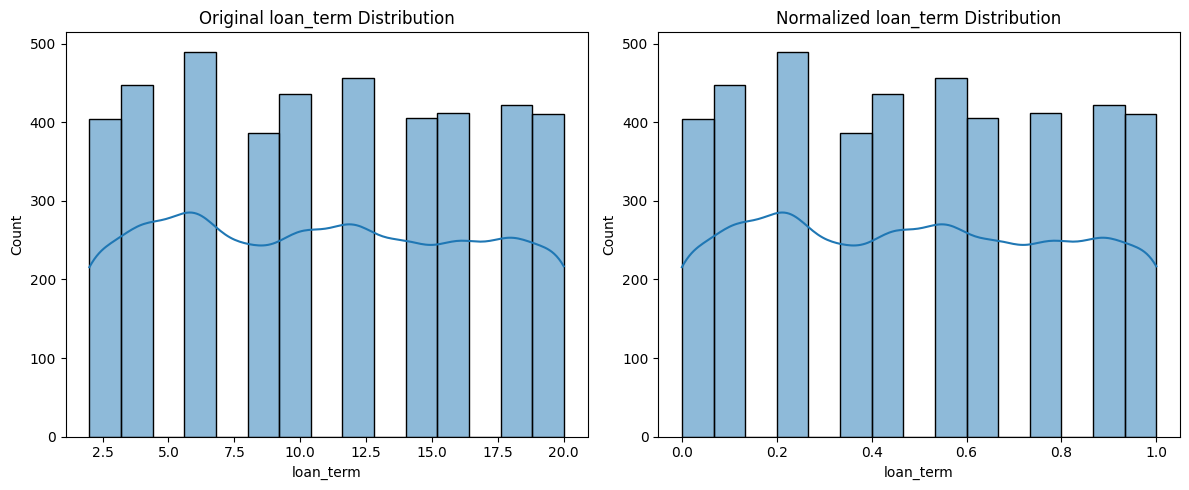

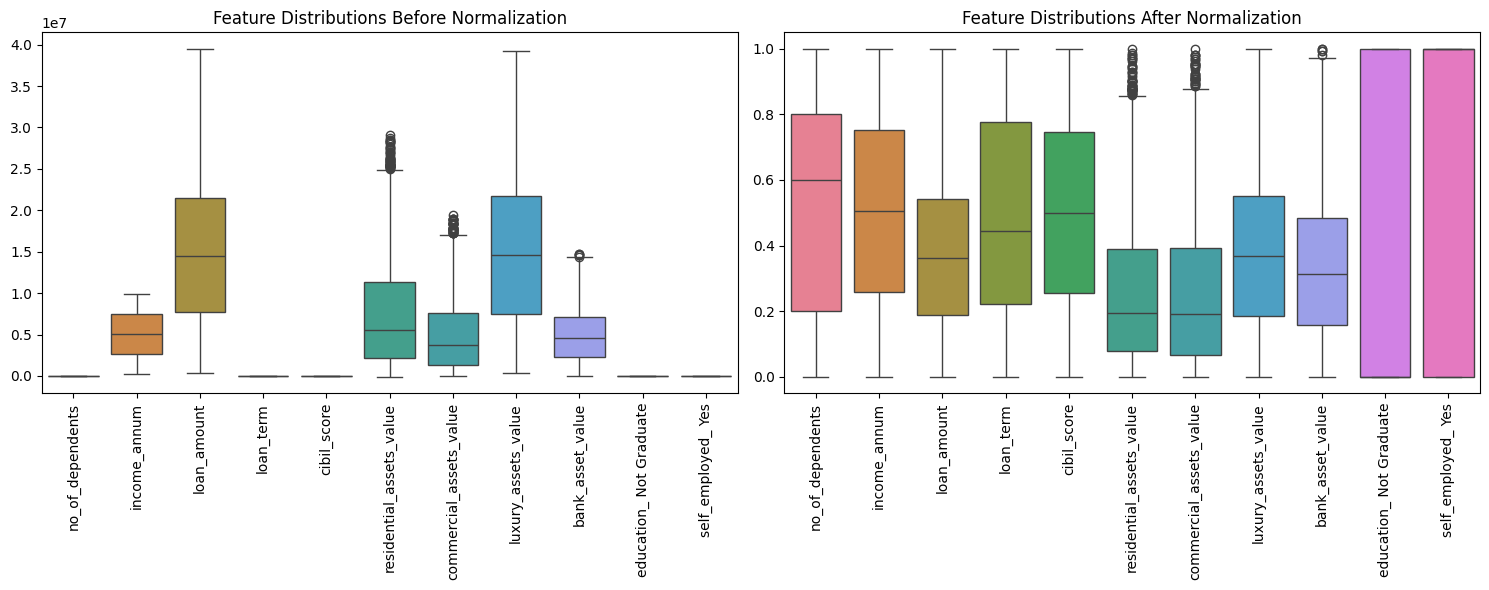

In [ ]:
# Function to visualize feature distributions before and after normalization
def plot_distributions(original, normalized, feature):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(original[feature], kde=True)
    plt.title(f'Original {feature} Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(normalized[feature], kde=True)
    plt.title(f'Normalized {feature} Distribution')

    plt.tight_layout()
    plt.show()

# Select a few numerical features to visualize
numerical_features = ['income', 'loan_amount', 'loan_term']

for feature in numerical_features:
    if feature in X.columns:
        plot_distributions(X, X_normalized_df, feature)

# #added during screencast
# Create a comparison boxplot of all features before normalization
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Feature Distributions Before Normalization')
plt.xticks(rotation=90)

# Create a comparison boxplot of all features after normalization
plt.subplot(1, 2, 2)
sns.boxplot(data=X_normalized_df)
plt.title('Feature Distributions After Normalization')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#Standardization with Z-Score Scaling + Impact on Model Performancea

##Part 1: Z-Score Standardization - Setting Up

In [ ]:
# Import additional libraries needed for Z-score standardization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("\n========== Z-SCORE STANDARDIZATION ==========")
print("Comparing Min-Max Normalization with Z-Score Standardization")


========== Z-SCORE STANDARDIZATION ==========
Comparing Min-Max Normalization with Z-Score Standardization


##Part 2: Understanding the Dataset in the Context of Z-Score Standardization



Statistical summary of numerical features:
       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06        

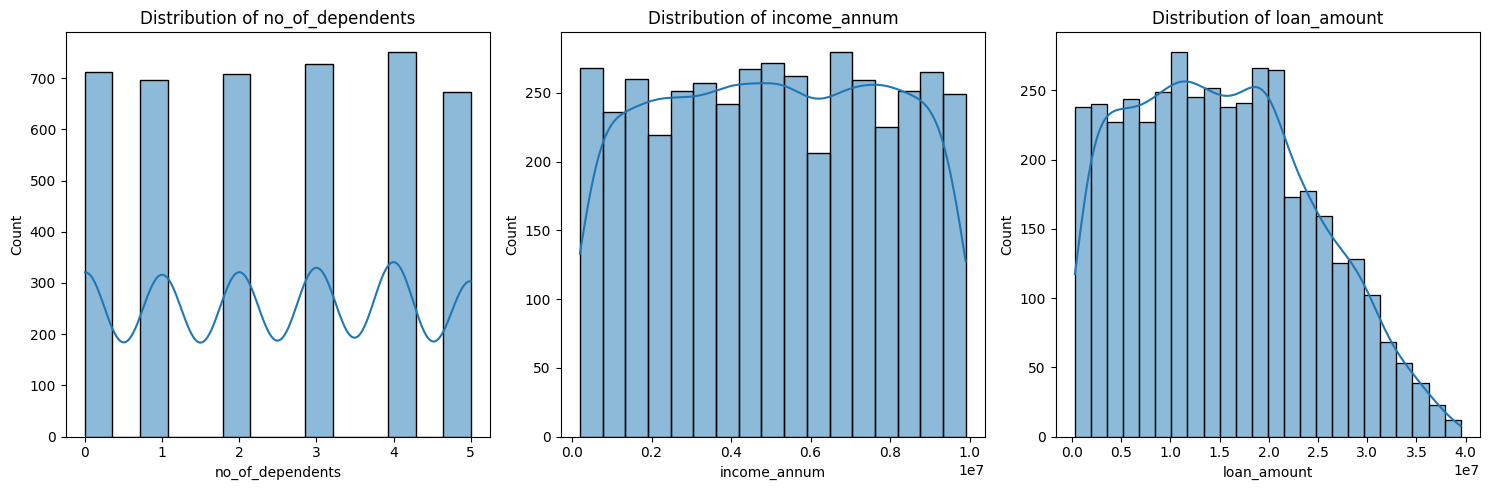

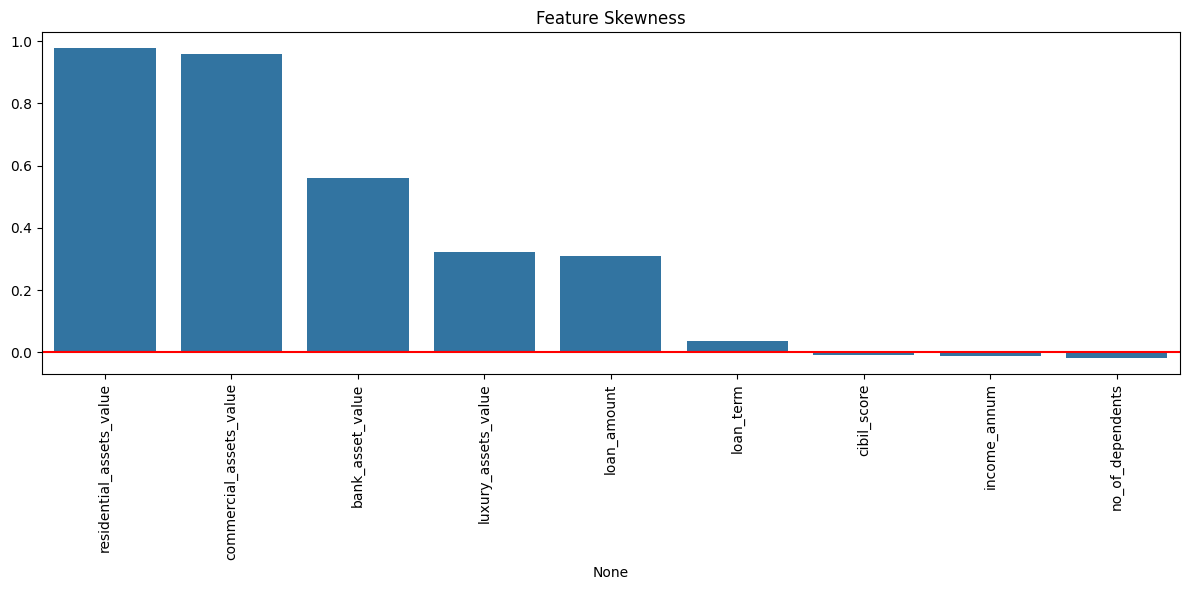

In [ ]:
# Revisit the statistical properties of our dataset
print("\nStatistical summary of numerical features:")
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
print(X[numerical_features].describe())

# Visualize the distribution of a few key features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features[:3]):  # First 3 numerical features
    plt.subplot(1, 3, i+1)
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# #added during screencast
# Visualize skewness of features
plt.figure(figsize=(12, 6))
skewness = X[numerical_features].skew().sort_values(ascending=False)
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Feature Skewness')
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

##Part 3: Applying Z-Score Standardization



Standardized data (first 5 rows):
   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0         -0.294102      1.617979     1.633052   0.192617     1.032792   
1         -1.473548     -0.341750    -0.324414  -0.508091    -1.061051   
2          0.295621      1.439822     1.610933   1.594031    -0.544840   
3          0.295621      1.119139     1.721525  -0.508091    -0.771045   
4          1.475067      1.689242     1.002681   1.594031    -1.264055   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                 -0.780058                 2.877289             0.832028   
1                 -0.733924                -0.631921            -0.694993   
2                 -0.057300                -0.107818             1.996520   
3                  1.649637                -0.381263             0.897943   
4                  0.757724                 0.735304             1.568075   

   bank_asset_value  education_ Not Graduate  self_employ

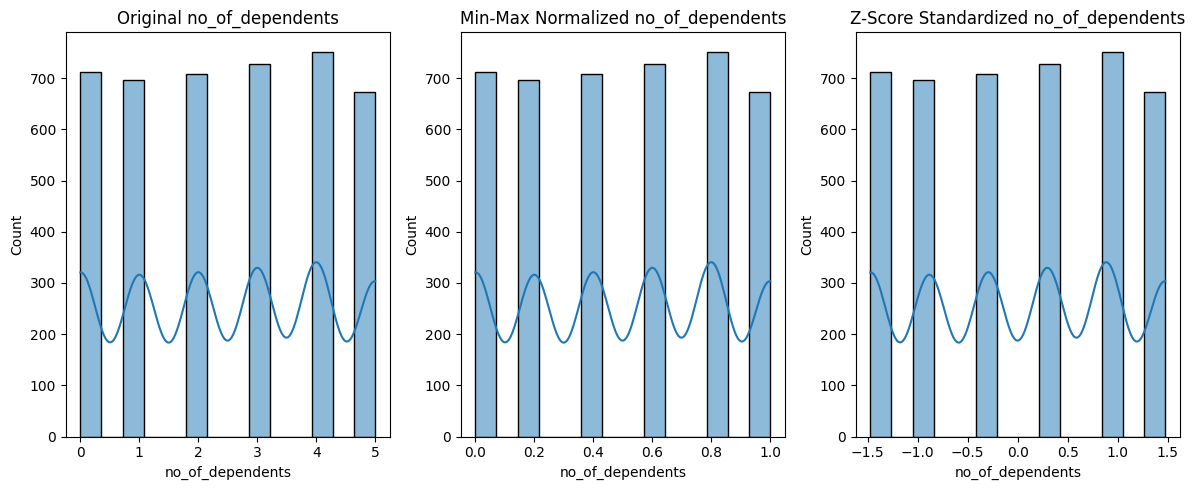

In [ ]:
# Initialize the StandardScaler
std_scaler = StandardScaler()

# Apply standardization to the features
X_standardized = std_scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# Display the standardized data
print("\nStandardized data (first 5 rows):")
print(X_standardized_df.head())

# Statistical summary of standardized features
print("\nStatistical summary of standardized numerical features:")
print(X_standardized_df[numerical_features].describe())

# #added during screencast
# Compare distributions before and after standardization
feature_to_plot = numerical_features[0]  # Choose one feature for example
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(X[feature_to_plot], kde=True)
plt.title(f'Original {feature_to_plot}')

plt.subplot(1, 3, 2)
sns.histplot(X_normalized_df[feature_to_plot], kde=True)
plt.title(f'Min-Max Normalized {feature_to_plot}')

plt.subplot(1, 3, 3)
sns.histplot(X_standardized_df[feature_to_plot], kde=True)
plt.title(f'Z-Score Standardized {feature_to_plot}')

plt.tight_layout()
plt.show()

##Part 4: Evaluating Impact on Model Performance



Model performance comparison:
Original Data Accuracy: 0.7986
Min-Max Normalized Accuracy: 0.9122
Z-Score Standardized Accuracy: 0.9052

Classification Report (Original Data):
              precision    recall  f1-score   support

       False       0.80      0.91      0.85       536
        True       0.80      0.61      0.69       318

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854


Classification Report (Min-Max Normalized):
              precision    recall  f1-score   support

       False       0.93      0.93      0.93       536
        True       0.89      0.87      0.88       318

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.91       854
weighted avg       0.91      0.91      0.91       854


Classification Report (Z-Score Standardized):
              precision    recall  f1-score   support

       False       0.92

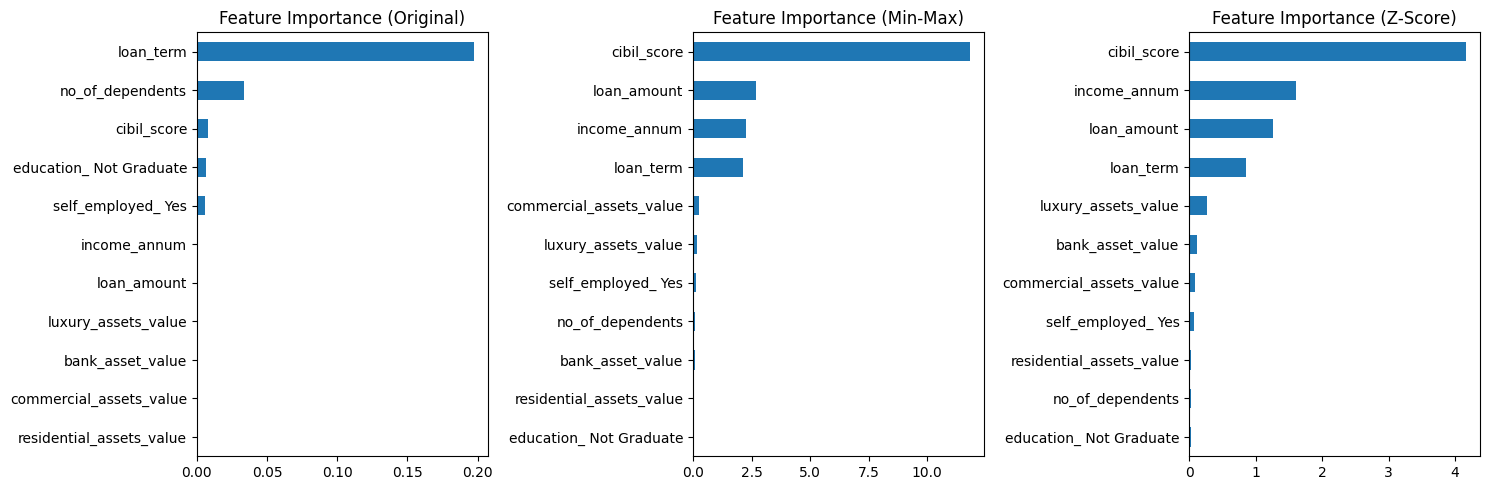

In [ ]:
# Previous code for standardization and splitting into train/test sets

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model on original data
model_original = LogisticRegression(max_iter=1000)  # Initialize the model
model_original.fit(X_train, y_train)  # Train the model
y_pred_original = model_original.predict(X_test)  # Make predictions

# Split the normalized data into training and testing sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_normalized_df, y, test_size=0.2, random_state=42
)

# Train a model on normalized data
model_normalized = LogisticRegression(max_iter=1000)
model_normalized.fit(X_train_norm, y_train_norm)
y_pred_normalized = model_normalized.predict(X_test_norm)


# Split the standardized data into training and testing sets
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    X_standardized_df, y, test_size=0.2, random_state=42
)

# Train a model on standardized data
model_standardized = LogisticRegression(max_iter=1000)
model_standardized.fit(X_train_std, y_train_std)
y_pred_standardized = model_standardized.predict(X_test_std)

# Compare model performances across all three approaches
print("\nModel performance comparison:")
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred_original):.4f}")
print(f"Min-Max Normalized Accuracy: {accuracy_score(y_test_norm, y_pred_normalized):.4f}")
print(f"Z-Score Standardized Accuracy: {accuracy_score(y_test_std, y_pred_standardized):.4f}")

# Show detailed classification reports
print("\nClassification Report (Original Data):")
print(classification_report(y_test, y_pred_original))

print("\nClassification Report (Min-Max Normalized):")
print(classification_report(y_test_norm, y_pred_normalized))

print("\nClassification Report (Z-Score Standardized):")
print(classification_report(y_test_std, y_pred_standardized))

# #added during screencast
# Visualize feature importance across different scaling methods
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
feature_importance = pd.Series(abs(model_original.coef_[0]), index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance (Original)')

plt.subplot(1, 3, 2)
feature_importance = pd.Series(abs(model_normalized.coef_[0]), index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance (Min-Max)')

plt.subplot(1, 3, 3)
feature_importance = pd.Series(abs(model_standardized.coef_[0]), index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance (Z-Score)')

plt.tight_layout()
plt.show()